# Thermal scattering laws

Please indicate your name below, since you will need to submit this notebook completed latest the day after the datalab.

Don't forget to save your progress during the datalab to avoid any loss due to crashes.

In [1]:
name=''

Thermalization is probably one of the most complicated phenomenon within reactor physics, which is difficult to handle analytically. Within this module we limit ourself to a brief introductory discussion, with the goal of to understand thermal scattering heuristically. We are going to study the available data, but will not venture into reconstructing thermal scattering kernels.

At thermal energies (up to a few eV, depending on the temperature) the 

- the kinetic energy of the scatterer atoms due to temperature effects is comparable to the kinetic energy of the incoming neutron
- the neutron energies are comparable to the binding energy of atoms in molecules or lattices of molecules/atoms, therefore the scatterer cannot be considered as a free gas anymore.
- neutrons do not behave as particles, but often we have to consider scattering of waves. The neutron wavelength is comparable to the inter-atomic spacing within a molecule or solid lattice, giving rise to diffraction effects.

At these energy the thermal scattering law, provided in data tables, is required to describe how a given nuclide behaves in a given material (eg. Hydrogen in light water, Carbon in graphite). Such thermal scattering laws (or TSL) are most often denoted as $S(\alpha,\beta)$, and still today the research on establishing accurate laws is on-going, both regarding improving existing data for commonly used moderators (eg. light water), and regarding extending the set of materials for which TSL is available (eg. NaOH for molten salt reactor applications).

Scattering at thermal energies is typically separated into two parts regarding possibility of interference:

- coherent
- incoherent

And two parts regarding energy transfer between the neutron and the molecule:

- elastic
- inelastic

Elastic scattering is not the same what we have discussed previously, scattering from a single nucleus where the neutron loses energy. In thermal elastic scattering the neutron scatters from the entire lattice of the material, therefore the target has a large effective mass, thus the neutron does not lose significant kinetic energy.

Nevertheless, in practice the following three different parts are defined (see eg p655 in the [NJOY manual](https://raw.githubusercontent.com/njoy/NJOY2016-manual/master/njoy16.pdf)):

- Coherent elastic scattering: the scattered neuton waves can interfere. Important for crystalline solids (eg. graphite)
- Incoherent elastic scattering: the scattered neuton waves do not interfere. Important for hydrogenous solids (eg. polyethylene)
- Inelastic: the neutron excites the molecule,  which includes both incoherent and coherent scattering. Important for all materials.

In this notebook we will take a look at the inelastic data, since for the most commonly used moderator, light water, this is the dominant reaction. 

Wait, how come that inelastic scattering reaction is present at thermal energies, when in fundamental reactor physics courses we learn that inelastic scattering is a threshold reaction which only contributes to slowing down at fast energies? Well, this is indeed a bit confusing, and a result of bad choice of words. Most often when we mention inelastic scattering, we mean the situation when the incoming neutron and the target nucleus forms a compound nucleus, which decays to an excited state of the target nucleus by emitting a neutron, then the excited state is relaxed down by emitting gamma photons. This is shown as path *b* in the figure below. Thus this reaction exchanges energy *with the nucleus*, and indeed the neutron needs to supply more energy than the first energy level of the target nucleus (typically the magnitude of that is MeV), therefore it is a threshold reaction.

<img src="https://github.com/ezsolti/RFP/blob/master/latexscr/figures/01-reactionlevels.png?raw=true" width="200"/>

In thermal scattering, the energy exchange happens with the molecule or atomic lattice as a whole. Neutrons may gain or lose energy in thermal inelastic scattering exciting or deexiting the target by producing phonons in the lattice, or by producing vibrations and rotations in molecules.  For example, if one considers water: it can be streched, bend, and intra molecular vibrations may be induced (see for example Fig. 4.3 for illustation in [report INDC(NDS)-0470](https://www-nds.iaea.org/publications/indc/indc-nds-0470.pdf). Often such lattice or intra molecular vibrations are referred to as phonons.

In the following we will focus only on incoherent inelastic scattering, however similar formalism applies for coherent and elastic scattering. In this case the cross section is given by (see eg. Sec. 7.2 of the [NJOY manual](https://raw.githubusercontent.com/njoy/NJOY2016-manual/master/njoy16.pdf):

$$\sigma^{inc}(E\rightarrow E',\mu)=\frac{\sigma_b}{2kT}\sqrt{\frac{E'}{E}}e^{-\beta/2}S(\alpha,\beta)$$

where $\sigma_b$ is the bound cross section for the nuclide, and the scattering law or scattering function $S(\alpha,\beta)$ depends on the dimensionless momentum transfer

$$\alpha=\frac{E'+E-2\mu\sqrt{E'E}}{AkT}$$

and the dimensionless energy transfer

$$\beta=\frac{E'-E}{kT}$$

where $k$ is Boltzmann's constant, $A$ is the ratio of the scatter mass to the neutron mass and $\mu$ is the scattering cosine in the LAB. In some textbooks the scattering law is given with the temperature as a variable $S(\alpha,\beta,T)$, as we will see later, indeed the scattering law depends on temperature, however we will omit this notation. 

One needs to be prudent when reading the references since the scattering law has a symmetric and a non-symmetric form, and sometimes it is easy to confuse the two, since many textbooks do not explicitly distinguish between them, whereas some reports and textbooks (eg. the NJOY manual) use a script-S ($\mathcal{S}(\alpha,\beta)$) notation for the non-symmetric form, which is not always easy to spot in text. With that the scattering kernel becomes (see eg. Eq. (507) in the [NJOY manual](https://raw.githubusercontent.com/njoy/NJOY2016-manual/master/njoy16.pdf)):

$$\sigma^{inc}(E\rightarrow E',\mu)=\frac{\sigma_b}{2kT}\sqrt{\frac{E'}{E}}\mathcal{S}(\alpha,\beta)$$

The symmetric form $S(\alpha,\beta)$ is thus

$$S(\alpha,\beta)=e^{\beta/2}\mathcal{S}(\alpha,\beta)$$

In the following we will simply refer to the scattering law as $S(\alpha,\beta)$, because ENDF works with the symmetric form, and this is what we will retrieve later. Nevertheless, when visualizing the non-symmetric form we will take special care to explain how to convert from the symmetric form. 

The $S(\alpha,\beta)$ law (or in fact, the non-symmetric form) can be calculated from the frequency spectrum of excitations in the system, $\rho(\beta)$. This spectrum is either measured or obtained from molecular dynamics simulations. Then, typically the LEAPR module of NJOY is used to determine $S(\alpha,\beta)$ at various temperatures over a given $\alpha$ and $\beta$ grid. The details can be found in eg. the [NJOY manual](https://raw.githubusercontent.com/njoy/NJOY2016-manual/master/njoy16.pdf) (p656). 

Research is still on-going to improve the frequency spectrum (or sometimes referred to as phonon spectrum) of various materials. Here we just highlight how the spectrum differs in various data libraries for water. The spectrum has three components, representing 

1. molecular translation, representing the collective movement, the diffusion of the molecules. Often a free gas approximation is considered, which is the most appropriate for gaseous materials, but to some extent can be used to represent water. It is important to highlight that the free gas approximation might be used only for representing molecular translation, while considering molecular bonds otherwise.
2. continuous type solid spectrum, which in case of water is related to rotational movement of molecules (hindrered by the degrees of freedom)
3. discrete oscillators. In case of water this can be streching and bending. Streching has both a symmetric and asymmetric mode, however these have frequencies so close to each other that they are usually not distinguished in models.

thus the frequency spectrum is a weighted sum of the components

$$\rho(\beta)=w_t\rho_t(\beta)+w_c\rho_c(\beta)+\sum_iw_i\delta(\beta_i)$$

where $\rho_t(\beta)$ and $\rho_c(\beta)$ give the translational and rotational spectra, and the oscillators are represented with a Diract delta function. The corresponding weights sum to 1. 

$S(\alpha,\beta)$ tables are placed at file MF=7 in the evaluated data libraries (MT=4 for thermal inelastic scattering), and the different libraries typically differ in the frequency spectrum, discrete oscillator frequencies, spectrum weights and diffusion constants (important to handle the translational part) provided as input for the LEAPR module (find further information and data in Chapter 3 of [Vaibhav Jaiswal's PhD thesis](https://www.irsn.fr/EN/Research/Theses-post-docs/Theses/Defended-thesis/PSN-EXP/Pages/2018-Jaiswal-theoretical-experimental-approach-towards-generation-thermal-scattering-law-light-water.aspx)).

Here we are only comparing the solid-type spectra of the IKE model adapted by ENDF/B-VII.1 (which were extracted from the LEAPR input files publish in Appendix 10.2.1 of the [INDC(NDS)-0470 report](https://www-nds.iaea.org/publications/indc/indc-nds-0470.pdf)) and of the CAB model adapted by ENDF/B-VIII.0 (extracted from LEAPR input files provided by Vaibhav Jaiswel, whose PhD thesis also provides further details and references on the models).

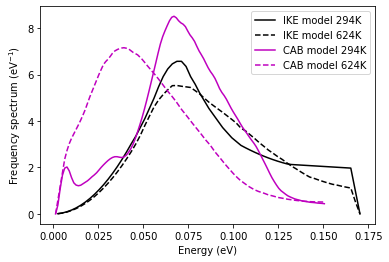

In [2]:
import numpy as np
import matplotlib.pyplot as plt

E_IKE=[i*0.002542 for i in range(1,68)]

spectrum294K_IKE=[0.010417,0.041671,0.093749,0.166682,0.260457,0.374972,0.510341,
    0.666586,0.843707,1.041692,1.260385,1.499907,1.760466,2.041717,
    2.343789,2.666650,3.010451,3.338729,3.721638,4.104406,4.542219,
    4.980193,5.473275,5.911964,6.240707,6.459711,6.569646,6.569798,
    6.350101,5.910588,5.581434,5.197376,4.868524,4.539521,4.265442,
    3.991243,3.717142,3.498139,3.278887,3.114840,2.950674,2.846502,
    2.747844,2.654690,2.567061,2.484945,2.408355,2.337267,2.271694,
    2.211646,2.157112,2.127321,2.115426,2.103531,2.091647,2.079752,
    2.067857,2.055962,2.044078,2.032184,2.020289,2.008394,1.996510,
    1.984615,1.972720,0.986360,0.000000]

spectrum624K_IKE=[0.009241,0.036971,0.083191,0.147901,0.231083,0.332760,0.452849,
    0.591487,0.748599,0.924198,1.118324,1.330876,1.561874,1.811430,
    2.079492,2.366205,2.671149,3.004446,3.377992,3.807549,4.210421,
    4.601901,4.905032,5.137760,5.343403,5.522043,5.528789,5.496279,
    5.470710,5.443103,5.305704,5.161395,4.980206,4.809356,4.660707,
    4.515263,4.372950,4.219132,4.068416,3.907689,3.690725,3.576285,
    3.408925,3.244872,3.068391,2.910673,2.747111,2.613069,2.470184,
    2.347965,2.202827,2.064036,1.946403,1.820161,1.699877,1.588447,
    1.528279,1.458090,1.392651,1.331715,1.275806,1.239591,1.193201,
    1.151560,1.114547,0.529185,0.000000]

E_CAB=[i*0.001265 for i in range(1,120)]

spectrum294K_CAB=[0.0000e+00,3.8183e-01,1.0796e+00,1.6625e+00,1.9735e+00,
    2.0196e+00,1.8515e+00,1.5652e+00,1.3384e+00,1.2414e+00,
    1.2130e+00,1.2339e+00,1.2963e+00,1.3604e+00,1.4245e+00,
    1.5091e+00,1.5999e+00,1.6795e+00,1.7703e+00,1.8850e+00,
    2.0024e+00,2.1078e+00,2.2058e+00,2.2969e+00,2.3736e+00,
    2.4315e+00,2.4631e+00,2.4630e+00,2.4420e+00,2.4283e+00,
    2.4497e+00,2.5256e+00,2.6468e+00,2.8022e+00,2.9994e+00,
    3.2493e+00,3.5338e+00,3.8369e+00,4.1585e+00,4.5100e+00,
    4.8879e+00,5.2840e+00,5.6880e+00,6.0939e+00,6.5062e+00,
    6.9240e+00,7.3146e+00,7.6278e+00,7.8765e+00,8.1019e+00,
    8.3148e+00,8.4660e+00,8.5106e+00,8.4430e+00,8.3176e+00,
    8.2258e+00,8.1672e+00,8.0634e+00,7.8788e+00,7.7084e+00,
    7.5812e+00,7.4298e+00,7.2166e+00,7.0165e+00,6.8529e+00,
    6.6832e+00,6.4839e+00,6.2897e+00,6.1278e+00,5.9917e+00,
    5.8309e+00,5.6189e+00,5.3965e+00,5.2295e+00,5.0961e+00,
    4.9383e+00,4.7503e+00,4.5634e+00,4.3927e+00,4.2340e+00,
    4.0757e+00,3.9060e+00,3.7421e+00,3.5991e+00,3.4636e+00,
    3.3199e+00,3.1826e+00,3.0533e+00,2.9071e+00,2.7299e+00,
    2.5375e+00,2.3434e+00,2.1513e+00,1.9532e+00,1.7492e+00,
    1.5582e+00,1.3939e+00,1.2399e+00,1.1004e+00,9.9699e-01,
    9.2203e-01,8.4542e-01,7.7743e-01,7.3029e-01,6.8805e-01,
    6.4727e-01,6.1932e-01,5.9475e-01,5.6481e-01,5.4473e-01,
    5.3324e-01,5.1494e-01,4.9853e-01,4.9162e-01,4.8152e-01,
    4.6689e-01,4.5969e-01,4.5248e-01,4.4006e-01]

spectrum624K_CAB=[0.000000E+00,5.900027E-01,1.180005E+00,1.768568E+00,2.356927E+00,
    2.726662E+00,3.024335E+00,3.255235E+00,3.446605E+00,3.638206E+00,
    3.830034E+00,4.032713E+00,4.253079E+00,4.487243E+00,4.761445E+00,
    5.031326E+00,5.272880E+00,5.514435E+00,5.756125E+00,5.997816E+00,
    6.215033E+00,6.429053E+00,6.557509E+00,6.659017E+00,6.783166E+00,
    6.920244E+00,7.015731E+00,7.071668E+00,7.115821E+00,7.141438E+00,
    7.155042E+00,7.135270E+00,7.107621E+00,7.031867E+00,6.956488E+00,
    6.903109E+00,6.849730E+00,6.754645E+00,6.654554E+00,6.537084E+00,
    6.414389E+00,6.297466E+00,6.183721E+00,6.068430E+00,5.951717E+00,
    5.830799E+00,5.703492E+00,5.574552E+00,5.441264E+00,5.310325E+00,
    5.192790E+00,5.075055E+00,4.949575E+00,4.824095E+00,4.681291E+00,
    4.536587E+00,4.411261E+00,4.291489E+00,4.166198E+00,4.037978E+00,
    3.912828E+00,3.790407E+00,3.668616E+00,3.547748E+00,3.424965E+00,
    3.297293E+00,3.172001E+00,3.059444E+00,2.946017E+00,2.807523E+00,
    2.669029E+00,2.551260E+00,2.435552E+00,2.313674E+00,2.190111E+00,
    2.074344E+00,1.962563E+00,1.851886E+00,1.742160E+00,1.638781E+00,
    1.544397E+00,1.456008E+00,1.382309E+00,1.309269E+00,1.239543E+00,
    1.170373E+00,1.113934E+00,1.057496E+00,1.013384E+00,9.703751E-01,
    9.380575E-01,9.085140E-01,8.731818E-01,8.349990E-01,8.051920E-01,
    7.823472E-01,7.569252E-01,7.279753E-01,7.026730E-01,6.859560E-01,
    6.687514E-01,6.492353E-01,6.300067E-01,6.162075E-01,6.024084E-01,
    5.892521E-01,5.761471E-01,5.666398E-01,5.580188E-01,5.488897E-01,
    5.395198E-01,5.322614E-01,5.266998E-01,5.220404E-01,5.185746E-01,
    5.158116E-01,5.146381E-01,5.134362E-01,5.121074E-01]

plt.figure()
plt.plot(E_IKE,spectrum294K_IKE,'k',label='IKE model 294K')
plt.plot(E_IKE,spectrum624K_IKE,'k--',label='IKE model 624K')
plt.plot(E_CAB,spectrum294K_CAB,'m',label='CAB model 294K')
plt.plot(E_CAB,spectrum624K_CAB,'m--',label='CAB model 624K')
plt.legend()
plt.xlabel('Energy (eV)')
plt.ylabel('Frequency spectrum (eV$^{-1}$)')
plt.show()

One can immediately notice that the IKE and CAB models describe a qualitatively different spectrum, partly because the IKE model employs a free gas molecular translation approximation, whereas the CAB model threats the molecular translation through the Egelstaff and Schofield model. As a result, at low energies a peak appears in the spectrum.

Although, not included in the figure, the two models also differ in the energy of the discrete oscillators.

## $S(\alpha,\beta)$ tables

As mentioned before, the above rotational spectra and other parameters are inputed to LEAPR, which then evaluates the $S(\alpha,\beta)$.

As before, we will access the data through [NDS-IAEA](https://www-nds.iaea.org/exfor/endf.htm). Here we focus on light water: select H-1 as target, and SIG/THS (ie. thermal scattering data) as quantity. For this example we have chosen the ENDF/B-VIII.0 library. Then, upon selecting "interpreted", one can access a long, but straightfoward table containing the $S(\alpha,\beta)$ values at various temperatures over the $\alpha$ and $\beta$ grid. We have placed the table in file `data/hinh2o_ENDF8-VIII0.dat` (without the header information). In order to facilitate reading this table, we have already extracted the content into a JSON file `data/hinh2o_ENDFB-VIII0.json`. For transparency, you can find the script to extract the data and build the JSON at the end of this notebook.

Let's load the data, and visualize the $S(\alpha,\beta)$ tables at 293.6K.

In [3]:
import json

with  open ('data/hinh2o_ENDFB-VIII0.json') as json_file:
    sabdata = json.load(json_file)

alpha=np.array(sabdata['2.936000+2']['alpha'])
beta=np.array(sabdata['2.936000+2']['beta'])
data=np.array([np.array(row) for row in sabdata['2.936000+2']['data']])

Let's visualize the table.

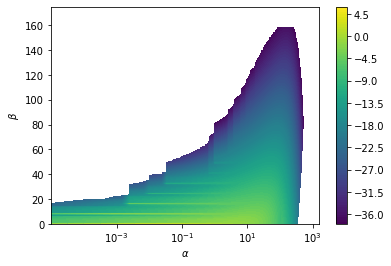

In [4]:
An, Bn = np.meshgrid(alpha, beta)

np.seterr(divide='ignore') #np.log10 is applied on 'data' which contains 0.0 values, we disable the warning

plt.figure()
plt.contourf(An,Bn,np.log10(data), levels=100)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.ylim(0,175)
plt.colorbar()
plt.show()

We can notice, that only certain $\alpha$, $\beta$ pairs are compatible, since only certain pairs are physical. For a given $\beta$, the minimum $\alpha$ occurs when the angle does not change, and the maximum $\alpha$ occurs for back scattering (see eg. Section 1.3.2 in [A. J. Trainer's Master thesis](https://dspace.mit.edu/bitstream/handle/1721.1/123419/1134764266-MIT.pdf?sequence=1&isAllowed=y))

Now we will try to replicate the figures in the [Understanfing NJOY tutorial](https://t2.lanl.gov/nis/njoy/ther02.html). Notice that in the first figure, we plot the non-symmetric form, thus the $S(\alpha,\beta)$ table is multiplied by $\exp(\beta/2)$, since for the non-symmetric form

$\mathcal{S}(\alpha,\beta)=e^{-\beta}\mathcal{S}(\alpha,-\beta) \rightarrow \mathcal{S}(\alpha,-\beta)=e^{\beta}\mathcal{S}(\alpha,\beta)$

and the symmetric form is defined as

$S(\alpha,\beta)=e^{\beta/2}\mathcal{S}(\alpha,\beta) \rightarrow \mathcal{S}(\alpha,\beta)=e^{-\beta/2}S(\alpha,\beta)$

thus

$$\mathcal{S}(\alpha,-\beta)=e^{\beta/2}S(\alpha,\beta)$$

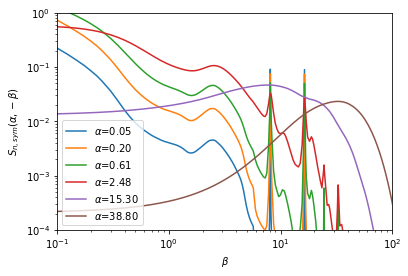

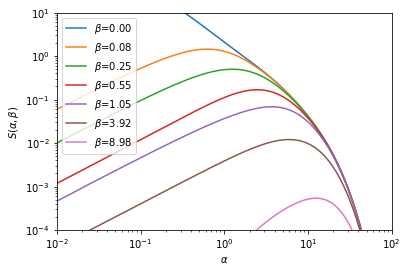

In [5]:
ind=[26,31,45,65,89,108]

plt.figure()
for i in ind:
    plt.loglog(beta, np.exp(beta/2)*data[:,i], label=r'$\alpha$={:.2f}'.format(alpha[i]))
plt.xlim(1e-1,1e2)
plt.ylim(1e-4,1)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$S_{n,sym}(\alpha,-\beta)$')
plt.legend()
plt.show()

ind=[0,35,42,48,58,106,136]

plt.figure()
for i in ind:
    betai=beta[i]
    plt.loglog(alpha, data[i,:], label=r'$\beta$={:.2f}'.format(beta[i]))
plt.xlim(1e-2,1e2)
plt.ylim(1e-4,10)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$S(\alpha,\beta)$')
plt.legend()
plt.show()

The sudden change in the curves at low $\alpha$ and high $\beta$ values is caused by the discrete oscillators. 

## Free gas approximation

The scattering function of a free gas is

$S(\alpha,\beta)=\frac{1}{\sqrt{4\pi\alpha}}\exp{\big\{-\frac{\alpha^2+\beta^2}{4\alpha}}\big\}$

often we use this function as an approximation, for example for oxygen bound in water. We implemented a program function `freeGas(a,b)` which evaluates the free gas scattering, and included in the figures the curves for free gas for some $\alpha$ and $\beta$ values. How do they compare?

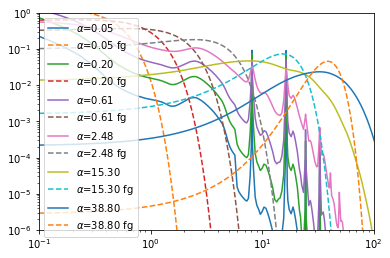

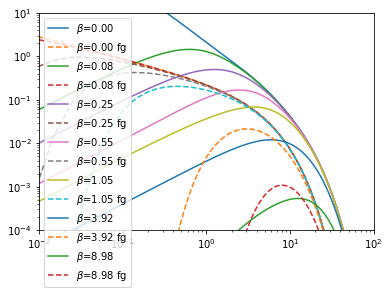

In [6]:
def freeGas(a,b):
    return 1/np.sqrt(4*np.pi*a)*np.exp(-(a**2+b**2)/4/a)

ind=[26,31,45,65,89,108]

plt.figure()
for i in ind:
    plt.loglog(beta, np.exp(beta/2)*data[:,i], label=r'$\alpha$={:.2f}'.format(alpha[i]))
    plt.loglog(beta, np.exp(beta/2)*freeGas(alpha[i],beta), label=r'$\alpha$={:.2f} fg'.format(alpha[i]),linestyle='--')
plt.xlim(1e-1,1e2)
plt.ylim(1e-6,1)
plt.legend()
plt.show()

ind=[0,35,42,48,58,106,136]


plt.figure()
for i in ind:
    betai=beta[i]
    plt.loglog(alpha, data[i,:], label=r'$\beta$={:.2f}'.format(beta[i]))
    plt.loglog(alpha, freeGas(alpha,betai), label=r'$\beta$={:.2f} fg'.format(beta[i]),linestyle='--')
plt.xlim(1e-2,1e2)
plt.ylim(1e-4,10)
plt.legend()
plt.show()

## Reconstructing cross sections and kernels

In this notebook we are not going to reconstruct the cross sections and the kernels from scratch, we just mention that a common method to reconstruct angular distributions and cross sections from the $S(\alpha,\beta)$ tables is by using the THERMR module of NJOY. As an example we have reconstructed the scattering cross sections, to highlight the importance of counsidering binding in molecules such as water. You can find the NJOY input in the appendix.

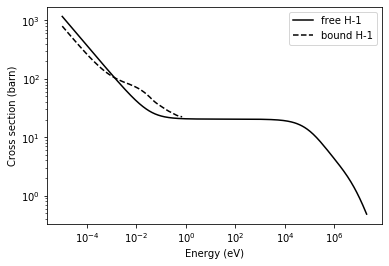

In [7]:
exsh,xsh=np.loadtxt('data/H1pw.dat',skiprows=2).transpose()
exsh_th,xsh_th=np.loadtxt('data/H1pw_thermr.dat').transpose()


plt.figure()
plt.loglog(exsh,xsh,'k',label='free H-1')
plt.loglog(exsh_th,xsh_th,'k--',label='bound H-1')
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (barn)')
plt.legend()
plt.show()   

The reader is referred to the [T2 NIS](https://t2.lanl.gov/nis/data/endf/endfvii-thermal-pdf/hh2o.pdf) to study the distribution of the outcoming energy and of the scattering cosine in thermal inelastic scattering on Hydrogen in light water. 

## Outlook

In this notebook we have not attempted to provide a detailed review of thermal scattering, our goal was to introduce the reader to information which is enough for the typical neutronics or reactor physics analyst. We would like to highlight that - as with any other subject - an element of self study is of a great importance, and we strongly believe that the reader now has the fundamentals to read further on the subject according to their on interest. 

It needs to be mentioned that in this notebook we have limited ourselves to discussing thermal inelastic scattering in light water, therefore we have disregarded a lot. The reader can browse the plots ("View PDF plots") at [T2 NIS](https://t2.lanl.gov/nis/data/endf/endfvii-thermal.html), for example to study elastic scattering in solids like graphite. We also encourage the reader to study deeper the documents and reports referenced in this notebook. 

As an interesting applied project we encourage the reader to perform criticality simulations (for example with openMC) in simple geometries, to test how including thermal scattering affects the results. As an appetizer the reader is referred to [Cullen et al. "How accurately can we calculate thermal systems?"](https://www-nds.iaea.org/publications/indc/indc-usa-0107/)

## Acknowledgment

I am grateful to Vaibhav Jaiswal for taking the time to discuss thermal scattering laws with me, and for providing LEAPR inputs describing the CAB model.

## Appendix

### Extracting $S(\alpha,\beta)$

Following code extracts the tables from the interpreted format, and saves it as a JSON.

In [8]:
import json
import numpy as np

def floatify(x):
    """
    Helper function to convert strings containing an "ENDF-number" into float.
    eg.  3.302550-2 to be converted as  0.0330255
        -2.207587-4 to be concerted as -0.0002207587
     
    Parameter
    ---------
    x : str
        Number to be converted as a string. Eg. '3.302550-2'
    """
    if x[0]=='-':
        i=max(x[1:].find('-'), x[1:].find('+'))+1
    else:
        i=max(x.find('-'), x.find('+'))
    return float(x[:i]+'e'+x[i:])

def getTemps(file='data/hinh2o_ENDF8-VIII0.dat'):
    """
    Function to extract all temperatures from S(a,b) file
    """
    content= open(file).readlines()
    Temps=[]
    for line in content:
        if 'Temp:' in line:
            x=line.strip().split()
            Temps.append(x[x.index('Temp:')+1]) 
    return np.unique(Temps)

def getBetas(file='data/hinh2o_ENDF8-VIII0.dat'):
    """
    Function to extract all beta grid from S(a,b) file
    """
    content= open(file).readlines()
    Betas=[]
    for line in content:
        if 'Beta:' in line:
            x=line.strip().split()
            Betas.append(floatify(x[x.index('Beta:')+1])) 
    return np.unique(Betas)

def getAlphas(file='data/hinh2o_ENDF8-VIII0.dat'):
    """
    Function to extract all beta grid from S(a,b) file
    """
    content= open(file).readlines()
    Alphas=[]
    for i,line in enumerate(content):
        if 'alpha          S' in line:
            for j in range(74):
                newline=content[i+2+j]
                x=newline.strip().split()
                Alphas.append(floatify(x[0]))
                Alphas.append(floatify(x[2]))
                Alphas.append(floatify(x[4]))
    return np.unique(Alphas)

def getSab(file='data/hinh2o_ENDF8-VIII0.dat', Temp='2.936000+2'):
    """
    Get S(a,b) table at given temperature.
    
    Note
    ----
    This is not going to work at 2.836000+2 K, because the tables are different.
    """

    content= open(file).readlines()
    reduced=[]
    for i,line in enumerate(content):
        if 'Temp: %s'%Temp in line:
            for j in range(42):
                reduced.append(content[i+j])
    data=[]
    for i,line in enumerate(reduced):
        if 'Beta:' in line:
            row=[]
            for j in range(38):
                x=reduced[i+4+j].strip().split()
                for xi in x:
                    row.append(floatify(xi))
            data.append(row)
    return data

temps=getTemps()
alpha=getAlphas()
beta=getBetas()

sab={}

for temp in temps[1:]:
    sab[temp]={'alpha':list(alpha),'beta':list(beta),'data':getSab(Temp=temp)}
    
with open('data/hinh2o_ENDFB-VIII0.json', 'w') as outfile:
    json.dump(sab, outfile, indent=4)

### THERMR of NJOY 

In order to reconstruct the cross section of bound Hydrogen, we have modified the [#9 test](https://github.com/njoy/NJOY21/blob/master/tests/09/input) example of NJOY. We have kept the same descriptive text, however we have modified the phonon spectrum to the IKE model (referenced earlier), and we used as tape20 a retrieved ENDF/B-VIII.0 tape from NDS-IAEA (see in file 'data/H1.endf'). Then the following NJOY input was run

```
    moder
     20 -21/
    reconr
     -21 -22/
     'pendf tape for h-1 from endf/b tape 511'/
     125 3/
     .005/
     '1-h-1 from tape 511'/
     'processed by the njoy nuclear data processing system'/
     'see original endf/b-v tape for details of evaluation'/
     0/
    broadr
     -21 -22 -23/
     125 1/
     .005/
     293.6/
     0/
    leapr
     24 /
     'h in h2o, shortened endf model'/
     1 1/
      101 1001/
      0.99917 20.478 2 0 0/
      1 1 15.85316 3.761 1/
     65 75 1/
      .01008 .015 .0252 .033 0.050406
      .0756 0.100812 0.151218 0.201624 0.252030 0.302436 0.352842
      0.403248 0.453654 0.504060 0.554466 0.609711 0.670259 0.736623
      0.809349 0.889061 0.976435 1.072130 1.177080 1.292110 1.418220
      1.556330 1.707750 1.873790 2.055660 2.255060 2.473520 2.712950
      2.975460 3.263080 3.578320 3.923900 4.302660 4.717700 5.172560
      5.671180 6.217580 6.816500 7.472890 8.192280 8.980730 9.844890
      10.79190 11.83030 12.96740 14.21450 15.58150 17.07960 18.72080
      20.52030 22.49220 24.65260 27.02160 29.61750 32.46250 35.58160
      38.99910 42.74530 46.85030 50.0/
      0.000000 0.006375 0.012750 0.025500 0.038250 0.051000 0.065750
      .0806495 0.120974 0.161299 0.241949 0.322598 0.403248 0.483897
      0.564547 0.645197 0.725846 0.806496 0.887145 0.967795 1.048440
      1.129090 1.209740 1.290390 1.371040 1.451690 1.532340 1.612990
      1.693640 1.774290 1.854940 1.935590 2.016240 2.096890 2.177540
      2.258190 2.338840 2.419490 2.500140 2.580790 2.669500 2.767090
      2.874450 2.992500 3.122350 3.265300 3.422470 3.595360 3.785490
      3.994670 4.224730 4.477870 4.756310 5.062580 5.399390 5.769970
      6.177660 6.626070 7.119240 7.661810 8.258620 8.915110 9.637220
      10.43200 11.30510 12.26680 13.32430 14.48670 15.76600 17.17330
      18.72180 20.42450 22.29760 24.35720 25.0/
      293.6/
     0.002542 68 / frequency distribution
      0.0
      0.010417 0.041671 0.093749 0.166682 0.260457 0.374972 0.510341
      0.666586 0.843707 1.041692 1.260385 1.499907 1.760466 2.041717
      2.343789 2.666650 3.010451 3.338729 3.721638 4.104406 4.542219
      4.980193 5.473275 5.911964 6.240707 6.459711 6.569646 6.569798
      6.350101 5.910588 5.581434 5.197376 4.868524 4.539521 4.265442
      3.991243 3.717142 3.498139 3.278887 3.114840 2.950674 2.846502
      2.747844 2.654690 2.567061 2.484945 2.408355 2.337267 2.271694
      2.211646 2.157112 2.127321 2.115426 2.103531 2.091647 2.079752
      2.067857 2.055962 2.044078 2.032184 2.020289 2.008394 1.996510
      1.984615 1.972720 0.986360 0.000000 /
      0.021739 0. .4891305 / weights
      2 / discrete oscillators
     .205 .436 / oscillator energies (eV)
      .1630435 .326087 / oscillator weigths
     ' h(h2o) thermal scattering '/
     ' '/
     ' temperatures = 293.6 deg k. '/
     ' '/
     ' shortened version of the endf/b-vi.4 evaluation for '/
     ' hydrogen in water.  the energy transfer is limited to '/
     ' 0.625 ev.  this is only for njoy testing, not for '/
     ' real applications. '/
     /
    thermr
     24 -23 -25/
     101 125 8 1 2 1 0 2 222 2/
     293.6/
     .05 .625/
    stop
```

Note that in the Thermr inputs MT=222 refers to H bound in water (see [T2 NIS](https://t2.lanl.gov/nis/njoy/ther01.html))

the output file (see in 'data/outHinH2O_inSab_el') was processed to extract the cross sections with the following code, and the point wise data was saved in 'data/H1pw_thermr.dat'.

In [9]:
njoyout=open('data/outHinH2O_inSab_el').readlines()
exs=[]
xs=[]
for line in njoyout:
    if 'incident energy = ' in line:
        x=line.strip().split()
        exs.append(float(x[3]))
        xs.append(float(x[7]))
np.savetxt('data/H1pw_thermr.dat',np.array([np.array(exs),np.array(xs)]).transpose())  